# Matplotlib

Módulo para visualización en Python. Está construido sobre arreglos numpy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt #se ha usado este alias por convención

### Creemos y grafiquemos cualquier función (primero a mano)

In [79]:
# y = -4x+7 
# Tabular: damos valores a x y estimamos los correspondientes valores de y
x = np.linspace(-20,20,10)
y = -4.*x+7.

$ y = \frac{1}{2}x+3$

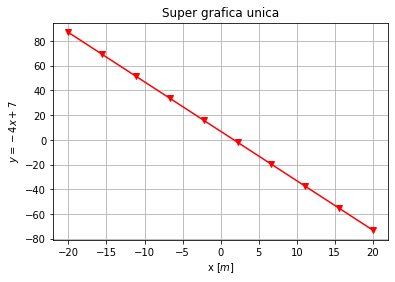

In [32]:
plt.plot(x,y,'rv-')
plt.grid()
plt.xlabel('x [$m$]')
plt.ylabel('$y = -4x+7$')
plt.title('Super grafica unica')
plt.savefig('recta.pdf',dpi = 500)

In [97]:
t = np.linspace(-2.5,2.5,100)
u = t**2 #Llenar con los valores de t al cuadrado

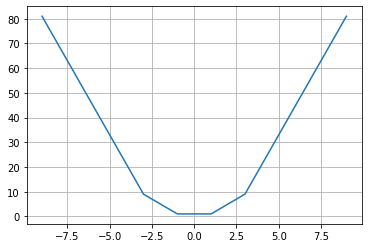

In [21]:
plt.plot(t,u)
plt.grid()

In [33]:
!wget https://www2.cs.uic.edu/~i101/SoundFiles/CantinaBand60.wav 

--2022-10-05 19:32:39--  https://www2.cs.uic.edu/~i101/SoundFiles/CantinaBand60.wav
Resolving www2.cs.uic.edu (www2.cs.uic.edu)... 131.193.32.16
Connecting to www2.cs.uic.edu (www2.cs.uic.edu)|131.193.32.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2646044 (2.5M) [audio/x-wav]
Saving to: ‘CantinaBand60.wav’

CantinaBand60.wav   100%[===================>]   2.52M  6.71MB/s    in 0.4s    

2022-10-05 19:32:40 (6.71 MB/s) - ‘CantinaBand60.wav’ saved [2646044/2646044]



In [43]:
from scipy.io.wavfile import read
fs,y = read('CantinaBand60.wav')
print('Frecuencia de muestreo: ',fs,' Tamaño de y: ',y.size)

Frecuencia de muestreo:  22050  Tamaño de y:  1323000


In [40]:
t = np.linspace(0,y.size/fs,y.size)

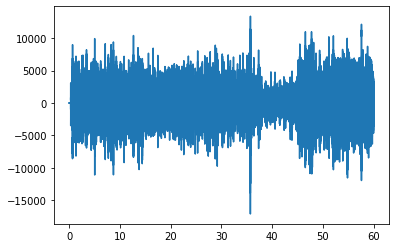

In [41]:
plt.figure()
plt.plot(t,y)

Text(0.5, 0, 'Frecuencia [Hz]')

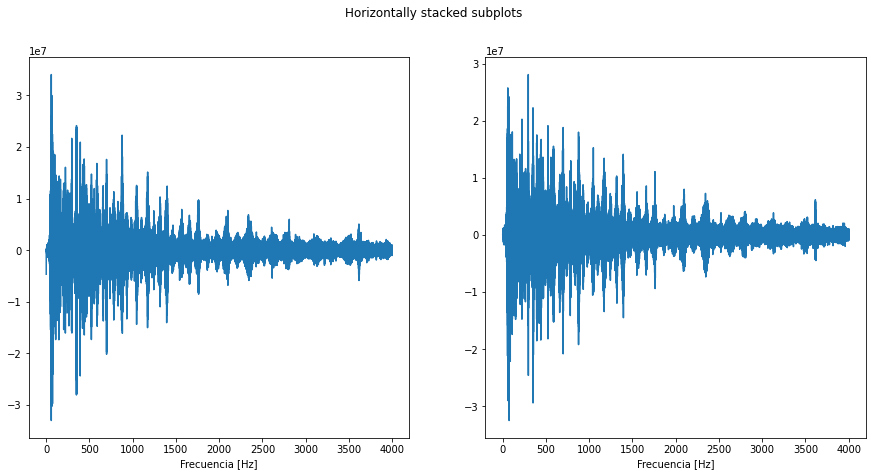

In [67]:
sp = np.fft.fft(y)
freq = np.fft.fftfreq(t.size)*fs
ind = np.where(np.bitwise_and(freq >= 0., freq < 4000. ))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Horizontally stacked subplots')
ax1.plot(freq[ind], sp[ind].real)
ax1.set_xlabel('Frecuencia [Hz]')
ax2.plot(freq[ind], sp[ind].imag)
ax2.set_xlabel('Frecuencia [Hz]')

#plt.plot(freq[ind], sp[ind].real, freq[ind], sp[ind].imag)

Text(0, 0.5, 'Magnitud [V]')

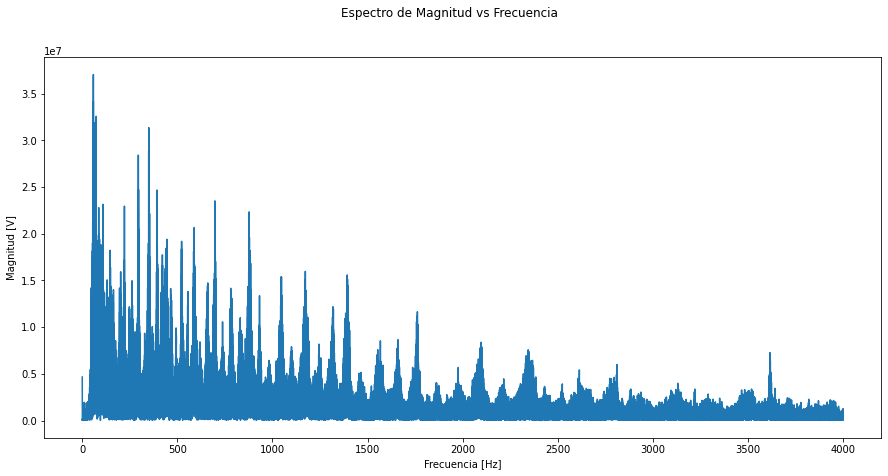

In [71]:
sp = np.fft.fft(y)
freq = np.fft.fftfreq(t.size)*fs
ind = np.where(np.bitwise_and(freq >= 0., freq < 4000. ))

fig, ax1 = plt.subplots(1, 1, figsize=(15, 7))
fig.suptitle('Espectro de Magnitud vs Frecuencia')
ax1.plot(freq[ind], np.abs(sp[ind]))
ax1.set_xlabel('Frecuencia [Hz]')
ax1.set_ylabel('Magnitud [V]')

In [77]:
import plotly.graph_objects as go
fig = go.Figure( go.Scatter(x=freq[ind], y=np.abs(sp[ind]) ) )
fig.show()

Output hidden; open in https://colab.research.google.com to view.

## Existen dos formas de crear gráficos con matplotlib:

 1. Usando plt directamente para graficar, esta forma es más rápida y es la más recomendable para empezar. Esta es la que usaremos en esta primer parte de la clase.
 2. Usando objetos y clases, esta forma da más control y es la que usaremos en la segunda parte de la clase.
 
## Sin importar cual se use, para generar un gráfico, se deben seguir los siguientes 5 pasos:
 
  1. __Preparar los datos que se desean graficar__
  2. __Crear o construir una figura__: una figura es el contenedor para cualquier tipo de gráfico que se quiera generar con matplotlib.pyplot.
  3. __Graficar (de ser necesario construir un área de dibujo)__: estas áreas se conocen como axes, ya que definen los ejes para el gráfico y la forma de proyectar los datos en este.
  4. __Personalizar el gráfico__: matplotlib.pyplot permite la personalización de muchos aspectos de un gráfico.
  5. __Mostrar o guardar el gráfico__ 


In [ ]:
#Paso 2
help(plt.figure)

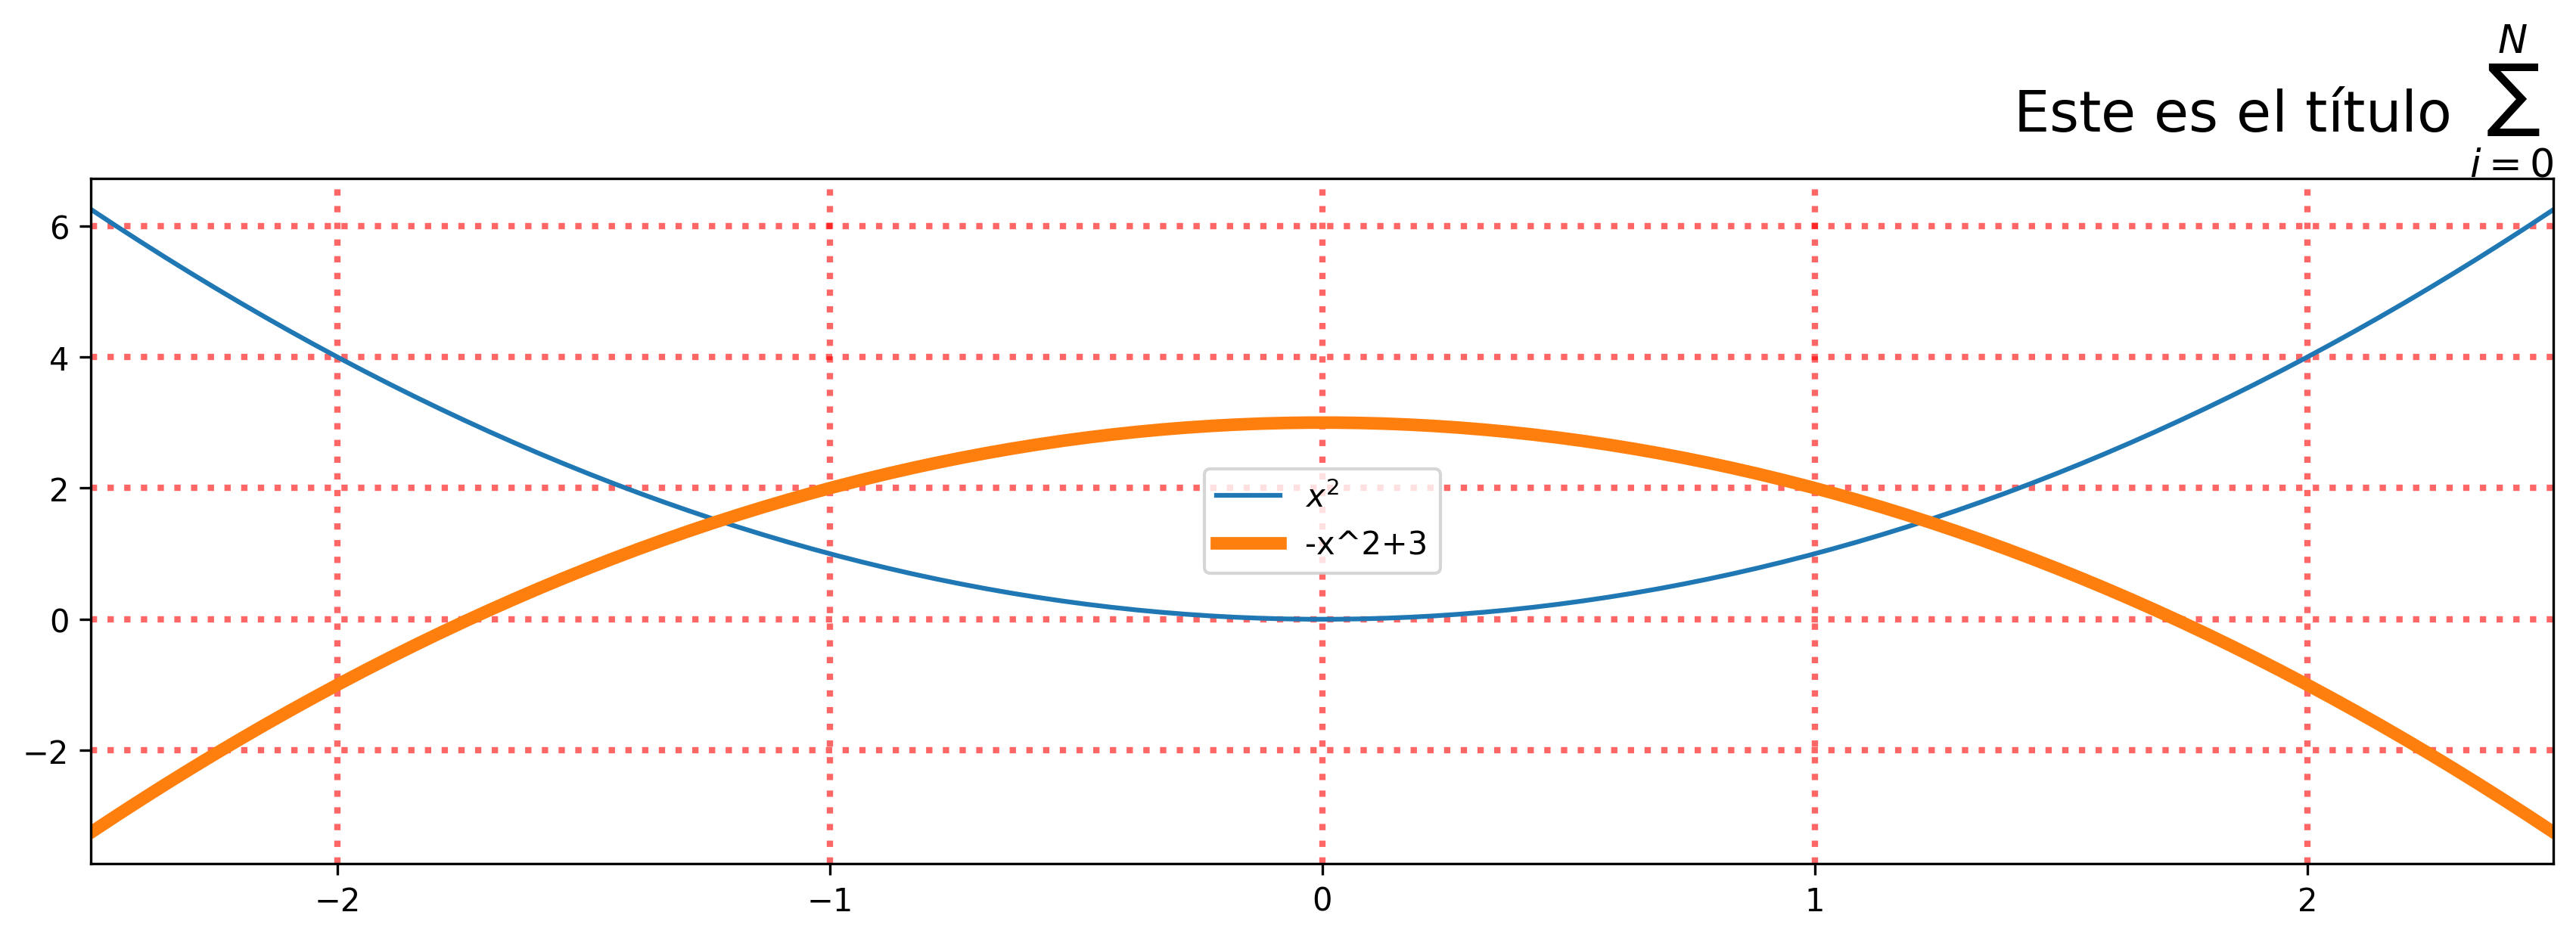

In [111]:
#Con mejor resolución (número de puntos)

plt.figure(figsize=(14,4), dpi=300) #2. Crear figura --> mostrar figsize=(ancho en pulgadas, alto en pulgadas) 
             # y dpi = número entero que define puntos por pulgada (resolución de imagen)
plt.plot(t,u) #3. Graficar
plt.plot(t,-u+3, linewidth=4, alpha=1.0) #3. Graficar
plt.title("Este es el título $\sum_{i=0}^{N}}$",fontsize=18, pad=12, loc='right') #4. Personalizar el gráfico
plt.grid(axis = 'both', color='r',linestyle = ':', linewidth=2, alpha=0.6)
plt.xlim([-2.5,2.5])
#plt.yticks([0,10,40,80])
#plt.xticks([-9,-3,3,9])
#plt.yticks([]) #apagar (quitar) yticks
#plt.xticks([]) #apagar (quitar) xticks
#plt.axis('off')
#plt.axis([-20, 20, -4, 100]) #plt.axis([limiteinfx, limitesupx, infy, supy])
#plt.ylabel('$f(x)= x^2$',fontsize=18)
# plt.xlabel('nombre eje x',fontsize=18, color='g')
# plt.show() # 5. Mostrar el gráfico
#plt.tight_layout()
plt.savefig('FiguraCreada.png', dpi=600, transparent=True)# 5. O guardar la figura. --> transparent=True)
plt.legend(['$x^2$','-x^2+3'], loc = 'center')
# dpi=None, facecolor='w'

## Partes de una figura
### Tomado de https://matplotlib.org/stable/gallery/showcase/anatomy.html

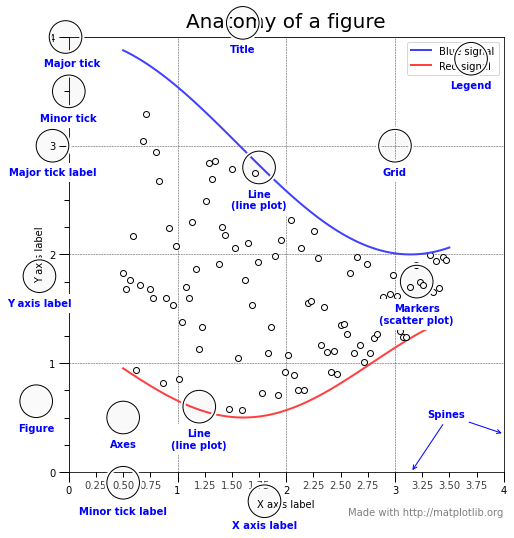

In [112]:
# This figure shows the name of several matplotlib elements composing a figure

from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

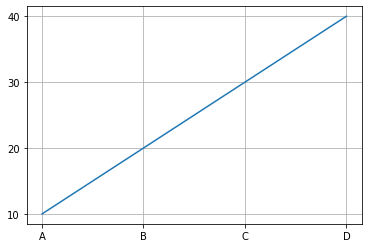

In [120]:
plt.plot([10, 20, 30, 40]) #Toma los x como el índice (posición)
plt.xticks([0,1,2,3],['A', 'B', 'C', 'D']);
plt.yticks([10, 20, 30, 40]);
plt.grid()

In [122]:
# Valores de 0 a 3 con pasos de 0.2
t = np.arange(0, 3.1, 0.2)
t

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. ])

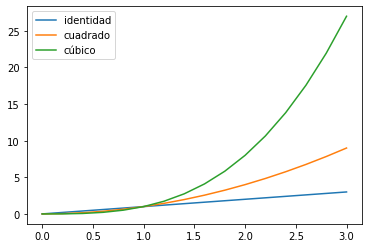

In [123]:
plt.figure()
plt.plot(t, t,label='identidad') 
plt.plot(t, t**2, label='cuadrado')
plt.plot(t, t**3,label='cúbico')
plt.legend()

plt.show()

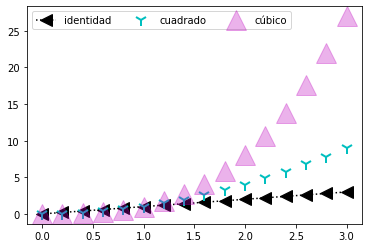

In [128]:
plt.figure()
plt.plot(t, t, 'k:<', label='identidad', markersize=12) #color, linewidth, marker, markersize, linestyles
# plt.plot(t, t, color='#14A6AD', linestyle=':', marker='h', label='identidad', markersize=17)
# plt.plot(t, t**2, 'y1', label='cuadrado', markersize=14,markeredgewidth=4)
plt.plot(t, t**2, color='c', marker = '1', linestyle=' ', label='cuadrado', markersize=12,markeredgewidth=2)
plt.plot(t, t**3, 'm^', label='cúbico', markersize = 20, alpha = 0.3)
#plt.plot(t, t**3, color='green', marker='^', linestyle=':', label='cúbico', markersize=13)
# plt.legend()
# plt.legend(loc='best')
plt.legend(ncol=3)
# plt.grid(color=(73/255, 97/255, 249/255, 0.8) , linestyle='-',linewidth=3)
# plt.grid(color='#39BC18' , linestyle='-',linewidth=3, alpha=0.4)
# plt.grid(color='0.8' , linestyle='-.',linewidth=2)
plt.show()

### Colores

El argumento de color se puede dar de las siguientes maneras
- Uno de {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}
- Una tupla de valores flotantes de RGB o RGBA en el rango [0,1]. Por ejemplo: (0.2, 0.5, 0.8) o (0.2, 0.5, 0.8, 0.4)
- Un string hexadecimal de RGB o RGBA (e.g., '#0f0f0f' or '#0f0f0f80'; es case-insensitive);
- Una representación string de un valor flotante en el rango [0,1] para niveles de gris, por ejemplo: '0.8'

#### Ejercicio

Graficar el seno y coseno de 0 a 4$\pi$ en un mismo gráfico y con marcadores, colores, estilos de línea diferentes.


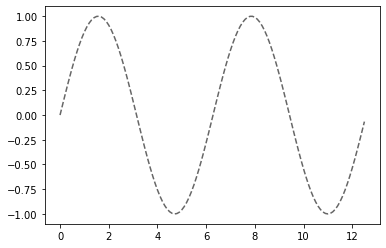

In [129]:
pi = np.pi

A = np.arange(0, 4*pi, 0.1)
sen = np.sin(A)
cos = np.cos(A)

plt.figure()
# plt.plot(A, sen, color='#8E0C25', linestyle = '--', label='seno')
plt.plot(A, sen, color='0.4', linestyle = '--', label='seno')
# plt.plot(A, cos, color=(180/255, 27/255, 168/255), label='coseno', linestyle = '-')
# plt.xticks([0,pi, 2*pi, 3*pi, 4*pi],[0,'$\pi$', '$2\pi$', '$3\pi$','$4\pi$'], fontsize=18)
# plt.grid(axis = 'y', color='k', linewidth=0.5)
# plt.legend()
plt.show()


## Subplots en Matplotlib

Hay varias formas de hacer esto. En esta clase se utilizará el método de agregar subplots. 

Cada figura puede contener varios gráficos, esta puede ser dividida en varias filas y columnas para asignar un área de dibujo a cada celda o elemento de la rejilla resultante. Para esto se utiliza la función *plt.subplot*; esta función recibe 3 argumentos. El primero es el número de filas, el segundo el número de columnas y el tercero, la posición en donde se asignará el área de dibujo.

In [ ]:
help(plt.subplot)

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(2,1,1)
plt.text(0.36,0.5,"Gráfico 1", fontsize=16)

plt.subplot(2,1,2)
plt.text(0.36,0.5,"Gráfico 2", fontsize=16)

plt.show()

#### Ejercicio

Graficar el seno y coseno de 0 a 4$\pi$ en diferentes gráficos y con marcadores, colores, estilos y tamaños de línea diferentes.

In [ ]:
# Celda solución
plt.figure(figsize=(15,4))

plt.subplot(2,1,1)
# plt.plot(A, sen, color='0.2', linestyle = '--', label='seno')
# plt.grid(axis = 'both', color='k', linewidth=0.5)
# plt.xticks([0,pi, 2*pi, 3*pi, 4*pi],[0,'$\pi$', '$2\pi$', '$3\pi$','$4\pi$'], fontsize=18)

plt.legend()

plt.subplot(2,1,2)
# plt.plot(A, cos, color=(180/255, 27/255, 168/255), label='coseno', linestyle = '-')
# plt.legend()
# plt.xticks([0,pi, 2*pi, 3*pi, 4*pi],[0,'$\pi$', '$2\pi$', '$3\pi$','$4\pi$'], fontsize=18)
# plt.grid(axis = 'both', color='k', linewidth=0.5)
# plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.plot(A, sen, color='0.2', linestyle = '--', label='seno')
# plt.grid(axis = 'both', color='k', linewidth=0.5)
# plt.xticks([0,pi, 2*pi, 3*pi, 4*pi],[0,'$\pi$', '$2\pi$', '$3\pi$','$4\pi$'], fontsize=18)

plt.legend()

plt.subplot(122)
plt.plot(A, cos, color=(180/255, 27/255, 168/255), label='coseno', linestyle = '-')
# plt.legend()
# plt.xticks([0,pi, 2*pi, 3*pi, 4*pi],[0,'$\pi$', '$2\pi$', '$3\pi$','$4\pi$'], fontsize=18)
# plt.grid(axis = 'both', color='k', linewidth=0.5)
# plt.tight_layout()
plt.show()

In [ ]:
plt.style.available

In [ ]:
# plt.style.use("tableau-colorblind10")
plt.style.use("default")

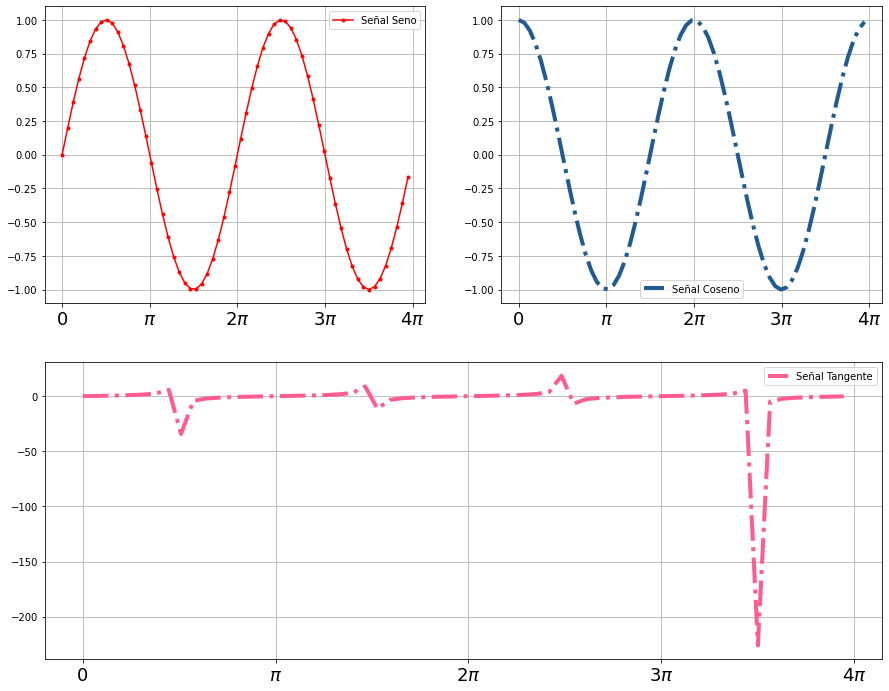

In [130]:
x = np.arange(0,4*np.pi,0.2)
c = np.cos(x)
s = np.sin(x)
t = np.tan(x)

plt.figure(figsize=(15,12))
plt.subplot(221)
plt.plot(x,s,marker='.', color='red', label='Señal Seno')
plt.grid()
plt.xticks([0,np.pi, 2*np.pi, 3*np.pi, 4*np.pi],[0,'$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'], fontsize=18)
plt.legend()

plt.subplot(2,2,2)
plt.plot(x,c,color = '#205C91', linestyle='-.', linewidth=4, label='Señal Coseno')
plt.grid()
plt.xticks([0,np.pi, 2*np.pi, 3*np.pi, 4*np.pi],[0,'$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'], fontsize=18)
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,t,color = '#FF5C91', linestyle='-.', linewidth=4, label='Señal Tangente')
plt.grid()
plt.xticks([0,np.pi, 2*np.pi, 3*np.pi, 4*np.pi],[0,'$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'], fontsize=18)
plt.legend()
plt.savefig("FiguraSub.png")

## Ahora usando la forma dos para crear gráficos con matplotlib:

 2. Usando objetos y clases, esta forma da más control.
 
 En esta segunda forma, las figuras y axes (gráficos) son objetos, por lo tanto para interactuar con ellos se hace con métodos.

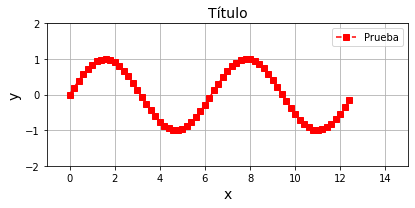

In [131]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111) 
ax.plot(x,s,'r--s',label='Prueba')
ax.set_ylim((-2,2))
ax.set_xlim((-1,15))
ax.grid()
ax.legend()
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
ax.set_title('Título', fontsize = 14)
plt.tight_layout()
fig.savefig("graficoConObjetos.png",dpi=400)

#### Ejercicio

Graficar el seno y coseno de 0 a 4$\pi$ en un mismo gráfico y con marcadores, colores, estilos de línea diferentes. Luego graficarlo en diferentes gráficos

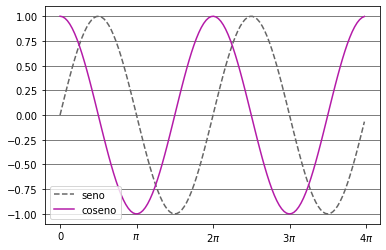

In [132]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(A, sen, color='0.4', linestyle = '--', label='seno')
ax.plot(A, cos, color=(180/255, 27/255, 168/255), label='coseno', linestyle = '-')
ax.set_xticks([0,pi, 2*pi, 3*pi, 4*pi])
ax.grid(axis = 'y', color='k', linewidth=0.5)
ax.set_xticklabels([0,'$\pi$', '$2\pi$', '$3\pi$','$4\pi$'])
ax.legend()
plt.show()

In [133]:
np.sum(cos*sen)

-0.01116832600412622

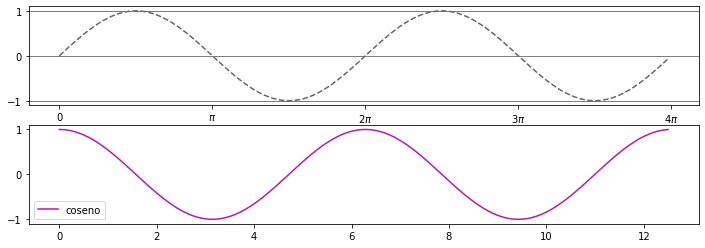

In [134]:
# plt.xkcd()

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(A, sen, color='0.4', linestyle = '--', label='seno')
ax2.plot(A, cos, color=(180/255, 27/255, 168/255), label='coseno', linestyle = '-')
ax1.set_xticks([0,pi, 2*pi, 3*pi, 4*pi])
ax1.grid(axis = 'y', color='k', linewidth=0.5)
ax1.set_xticklabels([0,'$\pi$', '$2\pi$', '$3\pi$','$4\pi$'])
ax2.legend()
plt.show()


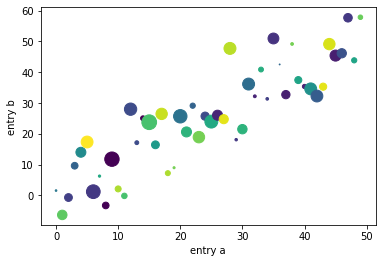

In [135]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

## [Tutorial de Pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)


## Ejemplos:
https://matplotlib.org/3.1.1/tutorials/introductory/sample_plots.html

In [ ]:
def paraboloide(x,y):
    return x**2 + y**2

In [ ]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.gca(projection='3d')

# FXY = lambda x,y: x**2+y**2

X = np.arange(-5, 5, 0.2)
Y = np.arange(-5, 5, 0.2)
# XX, YY = np.meshgrid(X, Y)

R = np.zeros((len(X),len(Y)))
XX = np.zeros((len(X),len(Y)))
YY = np.zeros((len(X),len(Y)))

for i in range(len(X)):
    for j in range(len(Y)):
        R[i,j] = paraboloide(X[i],Y[j])
        XX[i,j] = X[i]
        YY[i,j] = Y[j]

surf = ax.plot_surface(XX, YY, R,cmap='jet',alpha=0.3)

## Con Matplotlib se puede hacer mucho más!
### ver https://matplotlib.org/stable/tutorials/index.html